<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/keras_examples/VisualizingFiltersAndFeatureMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Resource: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

# Neural network models are generally referred to as being opaque. This means that they are poor at explaining the 
# reason why a specific decision or prediction was made.

# Convolutional neural networks are designed to work with image data, and their structure and function suggest that should be less 
# inscrutable than other types of neural networks.

# Specifically, the models are comprised of small linear filters and the result of applying filters called activation maps, or 
# more generally, feature maps.

# Both filters and feature maps can be visualized.

# For example, we can design and understand small filters, such as line detectors. Perhaps visualizing the filters within a 
# learned convolutional neural network can provide insight into how the model works.

# The feature maps that result from applying filters to input images and to feature maps output by prior layers could provide 
# insight into the internal representation that the model has of a specific input at a given point in the model.

<h1>Pre Fit VGG-16 Model</h1>

In [2]:
# # Instead of fitting a model from scratch, we can use a pre-fit prior state-of-the-art image classification model.
# This is a good model to use for visualization because it has a simple uniform structure of serially ordered convolutional and 
# pooling layers, it is deep
#  with 16 learned layers, and it performed very well, meaning that the filters and resulting feature maps will capture useful features


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16

In [4]:
# load the model
model = VGG16()

# summarize the model
model.summary()

553467904/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [5]:
from tensorflow.keras.utils import plot_model

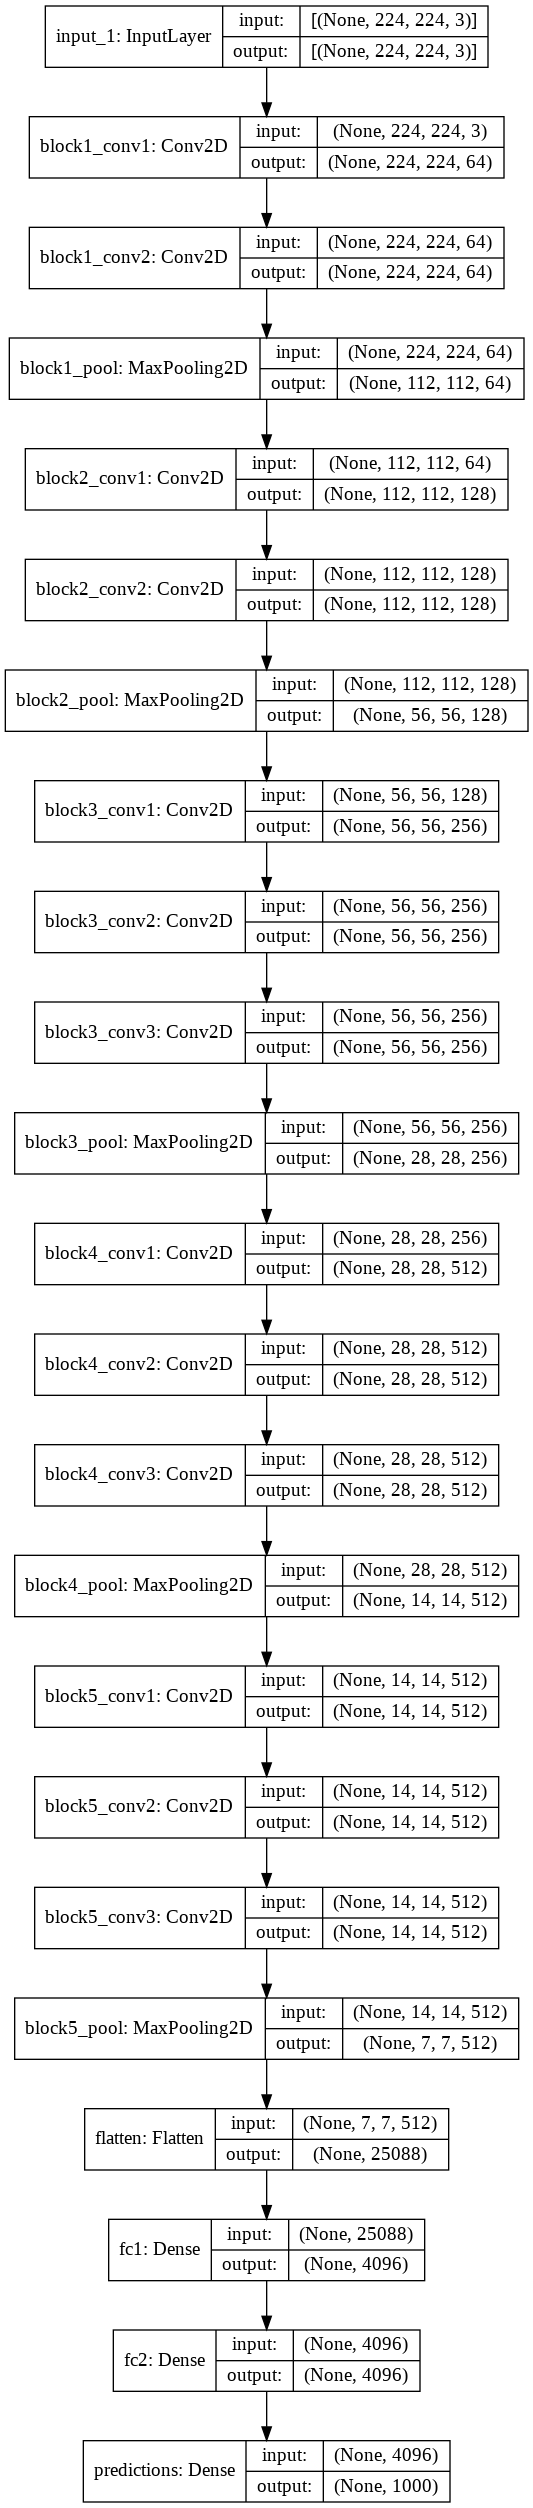

In [6]:
# plot model architecture
plot_model(model, show_shapes=True, to_file='vgg16.png')

<h1>Visualize Filters</h1>

In [7]:
# Each layer has a layer.name property, where the convolutional layers have a naming convolution like 
# block#_conv#, where the ‘#‘ is an integer. Therefore, we can check the name of each layer and skip any that don’t contain the string ‘conv‘


In [8]:
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue

    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [9]:
# We can see that all convolutional layers use 3×3 filters, which are small and perhaps easy to interpret.
# We could visualize one filter as a plot with three images, one for each channel, or compress all three down to a single color image, 
# or even just look at the first channel and assume the other channels will look the same. The problem is, we then have 63 other filters 
# that we might like to visualize.

In [10]:
# We can retrieve the filters from the first layer as follows
filters, biases = model.layers[1].get_weights()

In [11]:
# The weight values will likely be small positive and negative values centered around 0.0.
# We can normalize their values to the range 0-1 to make them easy to visualize.
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [12]:
# Now we can enumerate the first six filters out of the 64 in the block and plot each of the three channels of each filter.
# We use the matplotlib library and plot each filter as a new row of subplots, 
# and each filter channel or depth as a new column.
import matplotlib.pyplot as plt


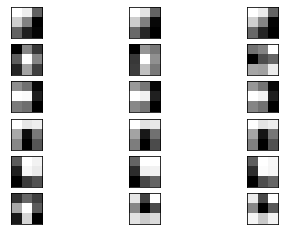

In [13]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]

	# plot each channel separately
	for channel in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
  
		ax.set_xticks([])
		ax.set_yticks([])
  
		# plot filter channel in grayscale
		plt.imshow(f[:, :, channel], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [14]:
# We can see that in some cases, the filter is the same across the channels (the first row), and in others, 
# the filters differ (the last row).

# The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights.
# Using this intuition, we can see that the filters on the first row detect a gradient from light in the top left to dark in the bottom right.


In [15]:
# Although we have a visualization, we only see the first six of the 64 filters in the first convolutional layer. 
# Visualizing all 64 filters in one image is feasible.

# Sadly, this does not scale; if we wish to start looking at filters in the second convolutional layer, we can see that again 
# we have 64 filters, but each filter has 64 channels. 
# To see all 64 channels in a row for all 64 filters would require (64×64) 4,096 subplots in which it may be challenging to see any detail.

<h1>How to Visualize Feature Maps</h1>

In [16]:
# The idea of visualizing a feature map for a specific input image would be to understand what features of the input are detected 
# or preserved in the feature maps. The expectation would be that the feature maps close to the input layer, detect small or fine-grained detail,
# whereas feature maps close to the output of the model capture more general features.

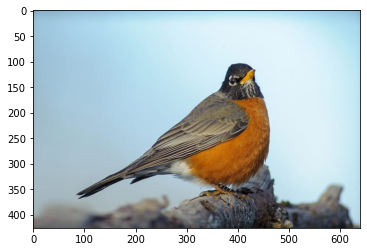

In [17]:
# Image Source: https://www.flickr.com/photos/husker_alum/8628754308/
import matplotlib.image as mpimg

img = mpimg.imread('/content/bird.jpg')
plt.imshow(img)

In [18]:
# Next, we need a clearer idea of the shape of the feature maps output by each of the 
# convolutional layers and the layer index number so that we can retrieve the appropriate layer output.

In [19]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
        
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [20]:
# We can use this information and design a new model that is a subset of the layers in the full VGG16 model. 
# The model would have the same input layer as the original model, but the output would be the output of a
# given convolutional layer, which we know would be the activation of the layer or the feature map.

# For example, after loading the VGG model, we can define a new model that outputs a feature map from 
# the first convolutional layer (index 1) as follows.

In [21]:
from tensorflow.keras.models import Model

In [22]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [23]:
# Making a prediction with this model will give the feature map for the first 
# convolutional layer for a given provided input image. Let’s implement this.

# After defining the model, we need to load the bird image with the size expected by the model, 
# in this case, 224×224.

In [24]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from numpy import expand_dims

In [25]:
img = load_img('/content/bird.jpg', target_size=(224, 224))

In [26]:
# Next, the image PIL object needs to be converted to a NumPy array of pixel data and expanded 
# from a 3D array to a 4D array with the dimensions of [samples, rows, cols, channels], 
# where we only have one sample.

In [27]:
# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

In [28]:
# The pixel values then need to be scaled appropriately for the VGG model
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

In [29]:
# We are now ready to get the feature map. We can do this easy by calling the model.predict() 
# function and passing in the prepared single image

In [30]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [32]:
# We know the result will be a feature map with 224x224x64.
#  We can plot all 64 two-dimensional images as an 8×8 square of images.

In [33]:
feature_maps.shape

(1, 224, 224, 64)

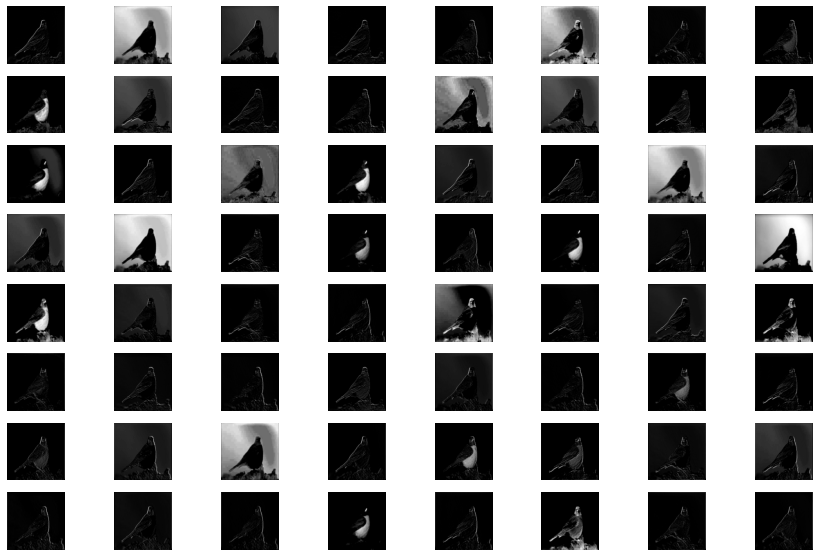

In [40]:
# Plotting 64 filters each of shape (224x224)
# create figure
fig = plt.figure(figsize=(15, 10))
  
# setting values to rows and column variables
rows = 8
columns = 8
ix = 1
for i in range(rows):
    for j in range(columns):
        fig.add_subplot(rows, columns, ix)
  
        # showing image
        plt.imshow(feature_maps[0, :, :, ix - 1], cmap = 'gray')
        plt.axis('off')

        ix += 1

In [41]:
# We can see that the result of applying the filters in the first convolutional layer is a 
# lot of versions of the bird image with different features highlighted

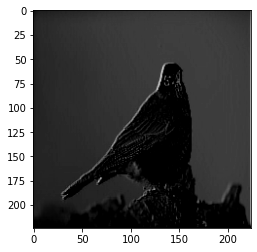

In [42]:
# Plotting only third filter
plt.imshow(feature_maps[0, :, :, 2], cmap='gray')

In [43]:
# This is very GREAT APPROACH
# Another approach would be to collect feature maps output from each block of the model in a single pass, 
# then create an image of each.

# There are five main blocks in the image (e.g. block1, block2, etc.) that end in a pooling layer. 
# The layer indexes of the last convolutional layer in each block are [2, 5, 9, 13, 17].

# We can define a new model that has multiple outputs, one feature map output for each of the 
# last convolutional layer in each block; for example:

In [45]:
# load the model
model = VGG16()

In [49]:
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]

outputs = [model.layers[i].output for i in ixs]

In [50]:
model = Model(inputs=model.inputs, outputs=outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

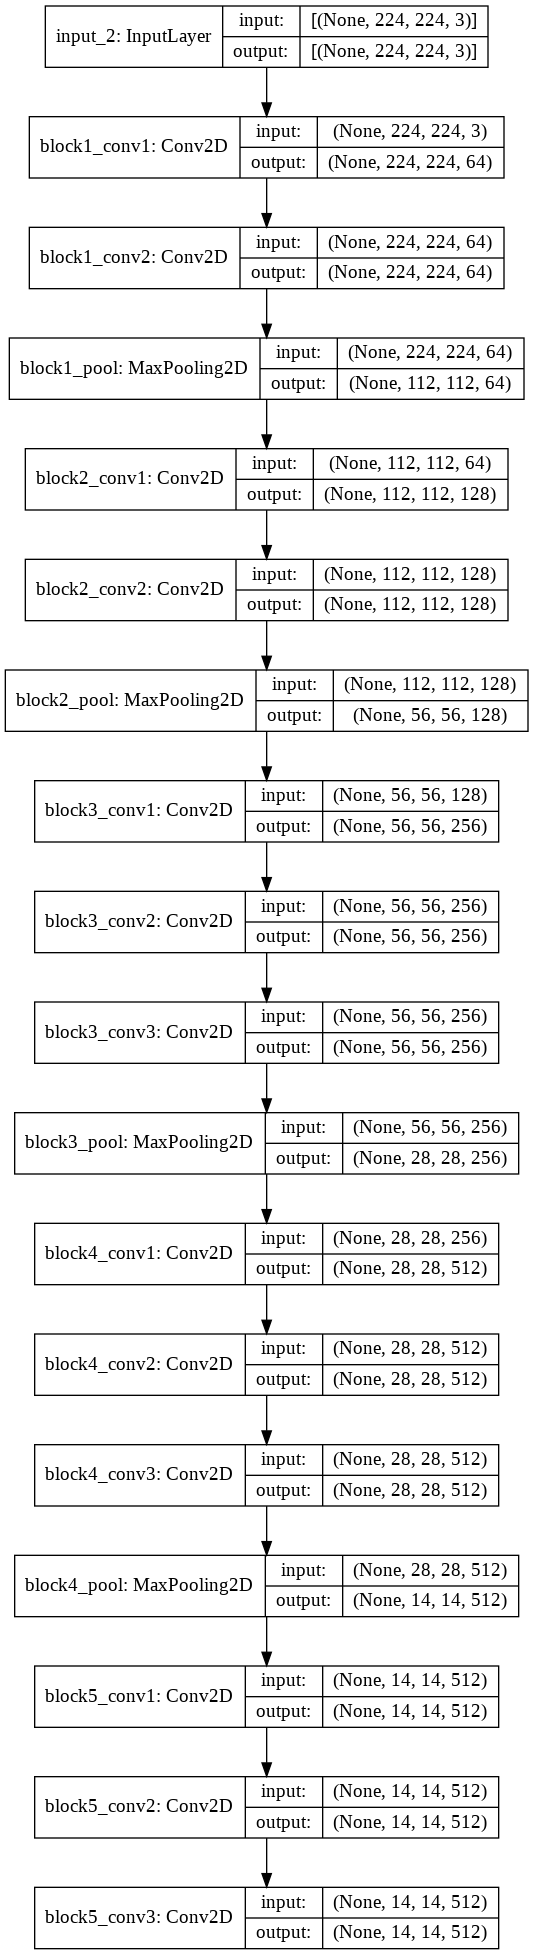

In [51]:
plot_model(model, show_shapes=True, to_file='multiple_output_conv.png')

In [52]:
# Making a prediction with this new model will result in a list of feature maps.

# We know that the number of feature maps (e.g. depth or number of channels) in deeper layers is 
# much more than 64, such as 256 or 512. Nevertheless, we can cap the number of feature maps 
# visualized at 64 for consistency.

In [53]:
feature_maps = model.predict(img)

In [56]:
for feature_map in feature_maps:
    print(feature_map.shape)

(1, 224, 224, 64)
(1, 112, 112, 128)
(1, 56, 56, 256)
(1, 28, 28, 512)
(1, 14, 14, 512)


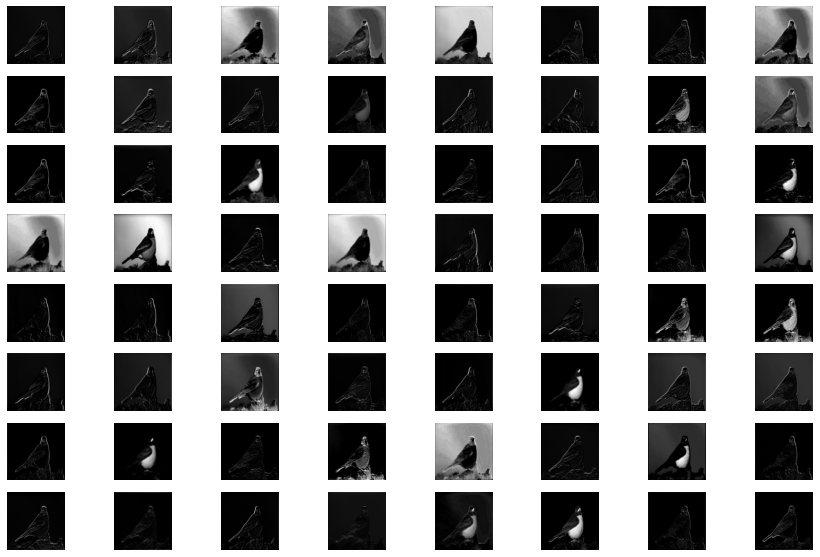

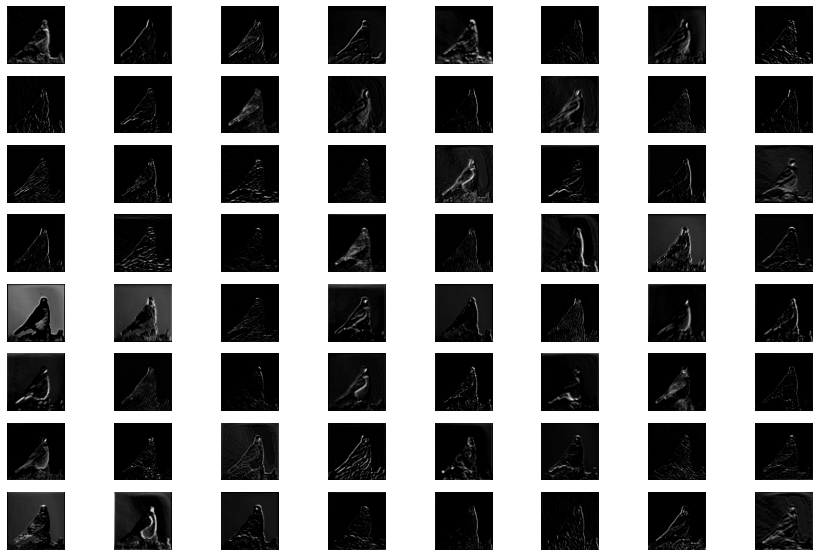

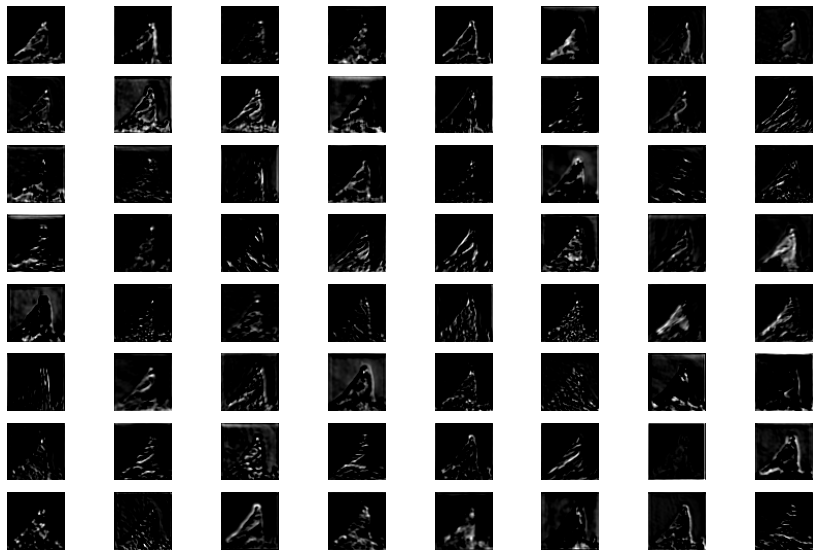

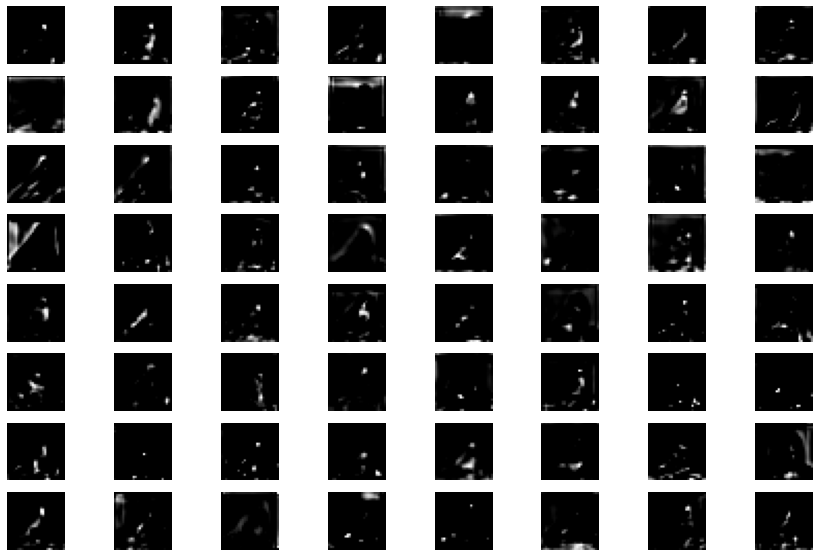

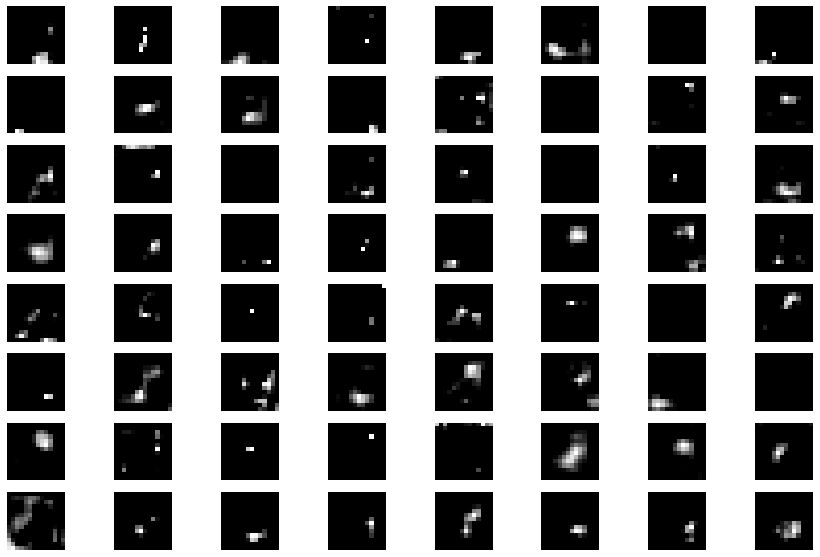

In [62]:
# plot the output from each block
square = 8

for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
    ix = 1
    fig = plt.figure(figsize=(15, 10))

    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            fig.add_subplot(square, square, ix)

            # plot filter channel in grayscale
            plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            plt.axis("off")
            ix += 1

    # show the figure
    plt.show()

In [63]:
# Running the example results in five plots showing the feature maps from the 
# five main blocks of the VGG16 model.

# We can see that the feature maps closer to the input of the model capture a lot of fine detail in 
# the image and that as we progress deeper into the model, the feature maps show less and less detail.

# This pattern was to be expected, as the model abstracts the features from the image into more general 
# concepts that can be used to make a classification. Although it is not clear from the final image 
# that the model saw a bird, we generally lose the ability to interpret these deeper feature maps.